# Sziasztok!
`Ctrl + Enter` lefuttat + ugyanaz a cella
`Shif + Enter` lefuttat + következő a cella
`Alt + Enter` lefuttat + új a cella

In [2]:
a = 5
b = 6
a+b

11

# Cursor shortcuts
`Ctrl + L` `Ctrl + I`  
inline `Ctrl + K`

In [8]:
# !pip install altair
# !pip install pandas

In [17]:
a = 5
b = 7

import altair as alt
import pandas as pd

# Create sample data
data = pd.DataFrame(
    
    {
    'x': range(5),
    'y': [a+b*i for i in range(5)]  # Using a and b from context
}

)

# Create line chart
chart = alt.Chart(data).mark_line().encode(
    x='x',
    y='y'
)


In [18]:
data

,x,y
0,0,5
1,1,12
2,2,19
3,3,26
4,4,33


In [19]:
chart

alt.Chart(...)

In [21]:
a = 6
b = 5
# Create sample data
data = pd.DataFrame(
    {
    'x': range(5),
    'y': [a+b*i for i in range(5)]  # Using a and b from context
}
)

# Create line chart
chart = alt.Chart(data).mark_line().encode(
    x='x',
    y='y'
)

chart


alt.Chart(...)

In [23]:
# Import required libraries if not already imported
import pandas as pd
import altair as alt
import eurostat

# Get inflation data from Eurostat
# HICP (2015 = 100) - annual data (average index and rate of change)
df = eurostat.get_data_df('prc_hicp_aind',
                         filter_pars={'unit': 'RCH_A',  # Annual rate of change
                                    'coicop': 'CP00'})   # All items HICP

# Clean and reshape the data
df = df.reset_index()
df = df[df['geo'].isin([c for c in df['geo'].unique() if len(c) == 2])]  # Keep only EU countries
df = df[df['time'] >= '1990']  # Filter from 1990
df = df.rename(columns={'values': 'inflation_rate',
                       'time': 'year',
                       'geo': 'country'})

# Create line chart
inflation_chart = alt.Chart(df).mark_line().encode(
    x=alt.X('year:T', title='Year'),
    y=alt.Y('inflation_rate:Q', title='Inflation Rate (%)'),
    color=alt.Color('country:N', title='Country'),
    tooltip=['country', 'year', 'inflation_rate']
).properties(
    width=800,
    height=500,
    title='EU Countries Inflation Rates (1990-Present)'
)

inflation_chart


faultcode: 150
faultstring: INVALID_QUERY_DIMENSION_VALUE: Query is invalid as per its structure's definition. The following values for dimension are not allowed: UNIT=RCH_A.


HTTPError: 400 Client Error: Bad Request for url: https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/prc_hicp_aind/.RCH_A.CP00.?format=TSV&compressed=true

In [26]:
import wbdata
import pandas as pd
from datetime import datetime

# Set up the date range
date_range = (datetime(1990, 1, 1), datetime.now())

# Define EU countries with their ISO codes
eu_countries = {
    'Austria': 'AUT', 'Belgium': 'BEL', 'Bulgaria': 'BGR', 'Croatia': 'HRV',
    'Cyprus': 'CYP', 'Czech Republic': 'CZE', 'Denmark': 'DNK', 'Estonia': 'EST',
    'Finland': 'FIN', 'France': 'FRA', 'Germany': 'DEU', 'Greece': 'GRC',
    'Hungary': 'HUN', 'Ireland': 'IRL', 'Italy': 'ITA', 'Latvia': 'LVA',
    'Lithuania': 'LTU', 'Luxembourg': 'LUX', 'Malta': 'MLT', 'Netherlands': 'NLD',
    'Poland': 'POL', 'Portugal': 'PRT', 'Romania': 'ROU', 'Slovakia': 'SVK',
    'Slovenia': 'SVN', 'Spain': 'ESP', 'Sweden': 'SWE'
}

# World Bank indicator for inflation (consumer prices, annual %)
indicator = {'FP.CPI.TOTL.ZG': 'inflation'}

# Fetch the data
df = wbdata.get_dataframe(indicator, country=list(eu_countries.values()), 
                         date=date_range)  # Changed from data_date to date

# Clean and process the data
df = df.reset_index()
df = df.rename(columns={'country': 'Country', 'date': 'Year'})
df = df.sort_values(['Country', 'Year'])

# Save to CSV
df.to_csv('eu_inflation_data.csv', index=False)

# Display first few rows
print(df.head())

# Basic statistics
print("\nSummary Statistics:")
print(df.groupby('Country')['inflation'].describe())

    Country  Year  inflation
33  Austria  1990   3.261872
32  Austria  1991   3.337427
31  Austria  1992   4.020848
30  Austria  1993   3.631785
29  Austria  1994   2.953409

Summary Statistics:
                 count       mean         std       min       25%       50%  \
Country                                                                       
Austria           34.0   2.442960    1.702581  0.506309  1.463885  2.071238   
Belgium           34.0   2.283440    1.639455 -0.053146  1.498216  2.087152   
Bulgaria          34.0  58.807430  187.527467 -1.418184  2.618083  5.978637   
Croatia           34.0  86.502661  284.078041 -1.125000  1.695673  3.253502   
Cyprus            34.0   2.500652    2.274447 -2.096998  1.484118  2.438065   
Czechia           32.0   4.956987    4.860396  0.118739  1.891510  2.850500   
Denmark           34.0   1.990780    1.303502  0.250000  1.180232  2.033546   
Estonia           31.0  10.019979   17.890913 -0.492326  2.876306  4.018490   
Finland        

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('eu_inflation_data.csv')

# Set style for better-looking plots
plt.style.use('seaborn')
sns.set_palette("husl")

# Create figure with two subplots
fig = plt.figure(figsize=(20, 12))

# 1. Line plot
ax1 = plt.subplot(211)
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Year'], country_data['inflation'], label=country, linewidth=1.5, alpha=0.7)

plt.title('Inflation Rates in EU Countries (1990-Present)', fontsize=14, pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Inflation Rate (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=10)

# 2. Heatmap
ax2 = plt.subplot(212)
# Pivot the data for the heatmap
heatmap_data = df.pivot(index='Country', columns='Year', values='inflation')

# Create heatmap
sns.heatmap(heatmap_data, cmap='RdYlBu_r', center=0, 
            annot=False, fmt='.1f', 
            cbar_kws={'label': 'Inflation Rate (%)'})

plt.title('Inflation Rates Heatmap', fontsize=14, pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig('eu_inflation_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional plot: Box plot for distribution
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='Country', y='inflation', color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Inflation Rates by Country', fontsize=14, pad=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Inflation Rate (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('eu_inflation_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

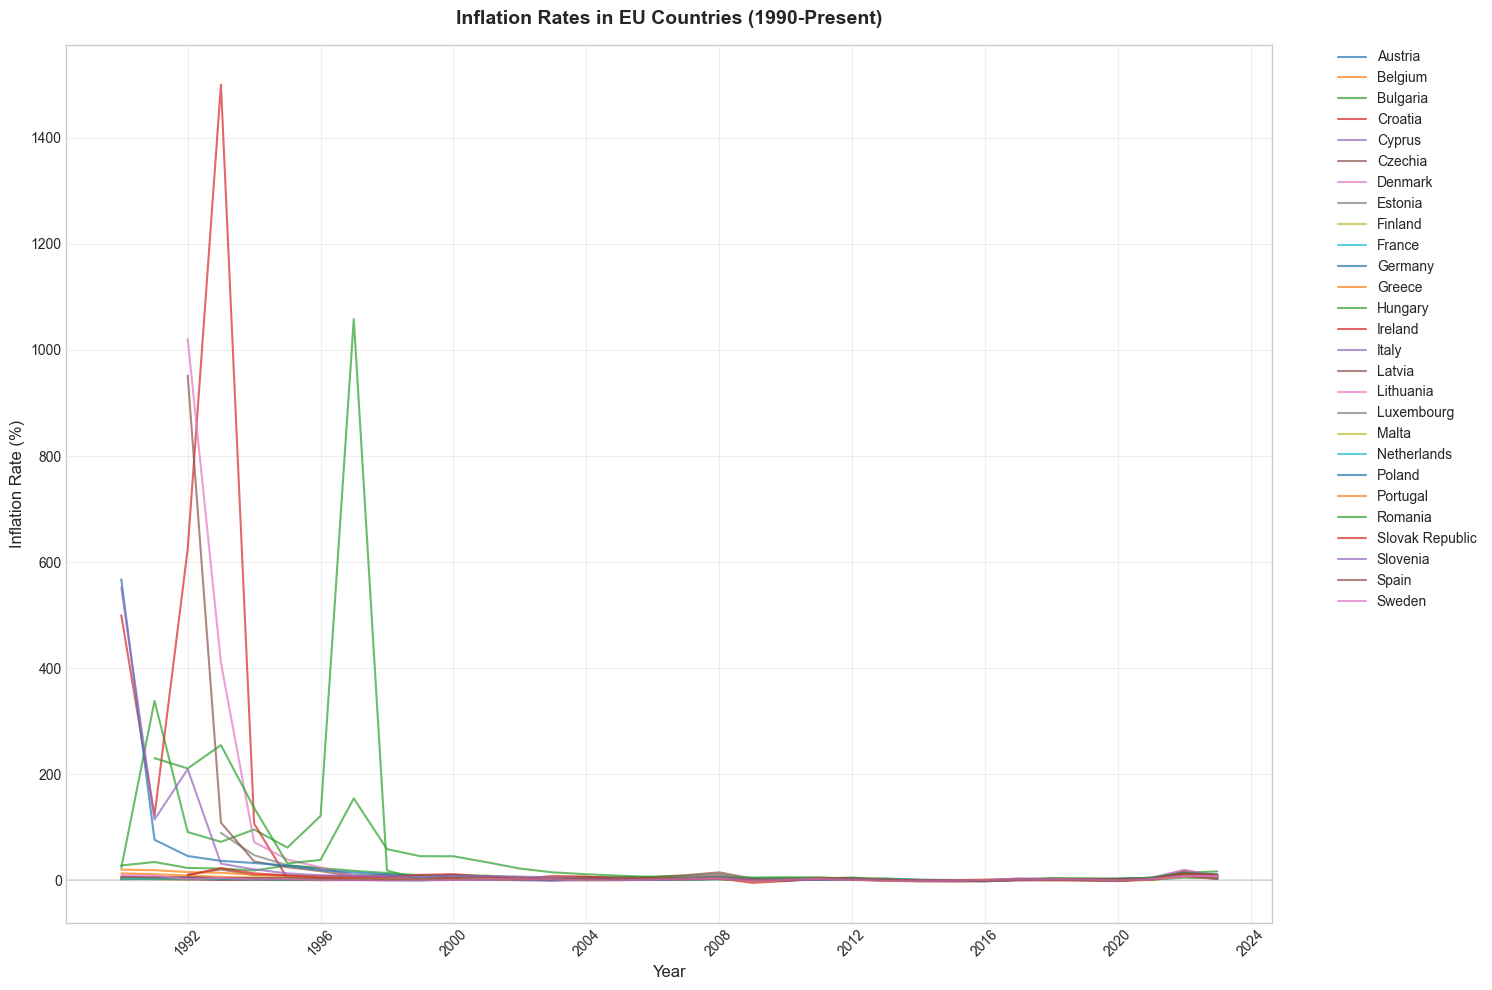

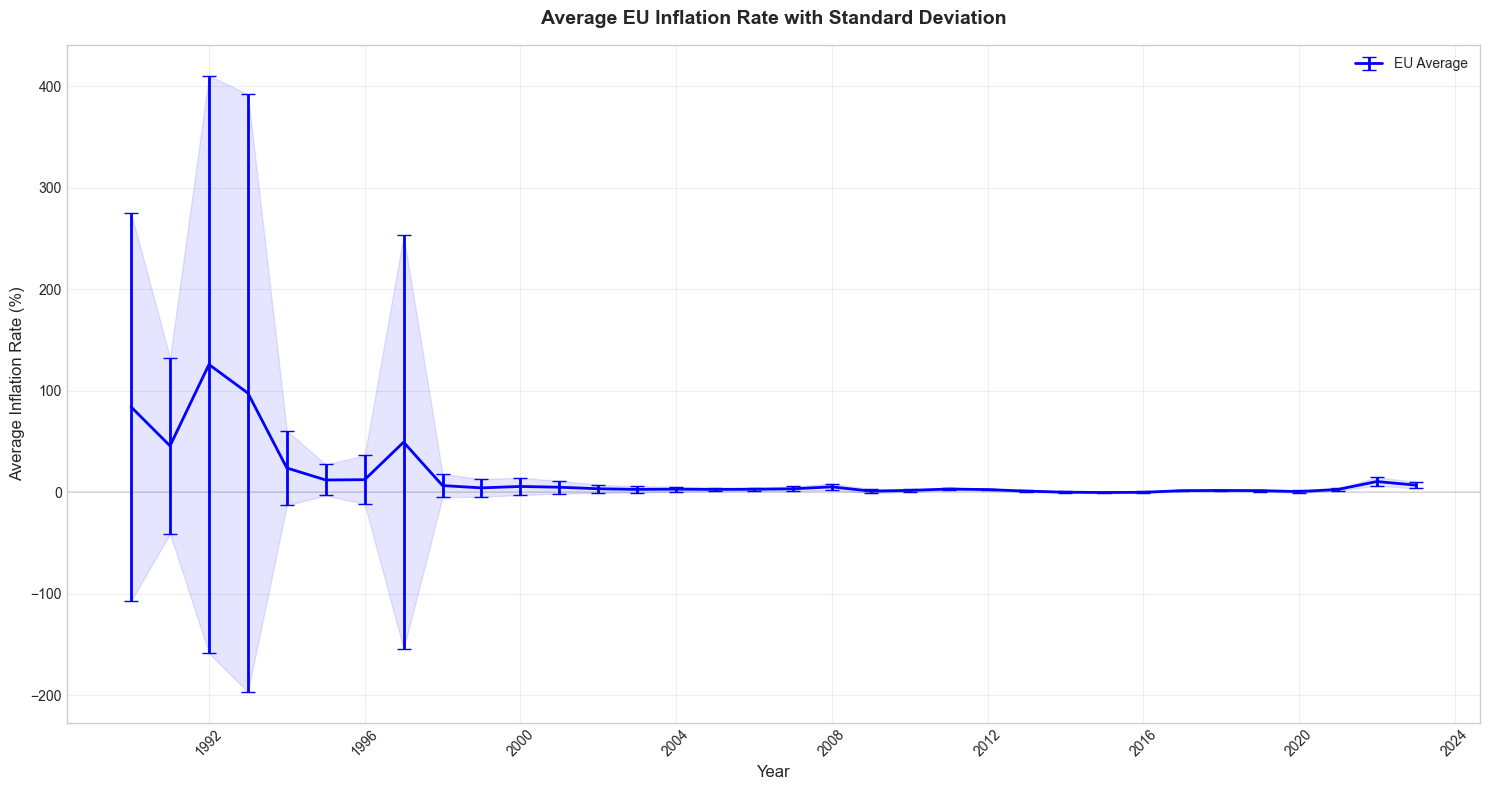

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

# Read the CSV file
df = pd.read_csv('eu_inflation_data.csv')

# Create figure
plt.figure(figsize=(15, 10))

# Set style
plt.style.use('seaborn-v0_8-whitegrid')

# Plot lines for each country with different colors
for country in sorted(df['Country'].unique()):
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Year'], country_data['inflation'], 
             label=country, linewidth=1.5, alpha=0.7)

# Customize the plot
plt.title('Inflation Rates in EU Countries (1990-Present)', 
         fontsize=14, pad=15, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Inflation Rate (%)', fontsize=12)

# Improve x-axis
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # Force integer years
plt.xticks(rotation=45)

# Add legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), 
          loc='upper left', 
          borderaxespad=0., 
          fontsize=10)

# Add grid with lower opacity
plt.grid(True, alpha=0.3)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='black', linestyle='-', alpha=0.1)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
plt.savefig('eu_inflation_trends.png', 
            dpi=300, 
            bbox_inches='tight')

plt.show()

# Create a second visualization: Annual average inflation
plt.figure(figsize=(15, 8))

# Calculate average inflation by year
yearly_avg = df.groupby('Year')['inflation'].mean()
yearly_std = df.groupby('Year')['inflation'].std()

# Plot average with error bars
plt.errorbar(yearly_avg.index, yearly_avg.values, 
            yerr=yearly_std.values, 
            capsize=5, 
            color='blue', 
            linewidth=2, 
            label='EU Average')

plt.fill_between(yearly_avg.index, 
                yearly_avg.values - yearly_std.values,
                yearly_avg.values + yearly_std.values, 
                color='blue', 
                alpha=0.1)

# Customize the plot
plt.title('Average EU Inflation Rate with Standard Deviation', 
         fontsize=14, pad=15, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Inflation Rate (%)', fontsize=12)

# Improve x-axis
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45)

# Add grid with lower opacity
plt.grid(True, alpha=0.3)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='black', linestyle='-', alpha=0.1)

plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig('eu_inflation_average.png', 
            dpi=300, 
            bbox_inches='tight')

plt.show()